In [12]:
import random as random
import matplotlib.pyplot as plt
import numpy as np
random.seed(None);

In [13]:
def walk(l):
    position = 0
    positions = []
    for i in range(l):
        positions.append(position)
        position += random.choice([-1, 1])
    return positions

In [14]:
def plotWalk(walk):
    rn = range(len(walk))
    xs = np.array(rn)
    plt.plot(xs, walk)

In [15]:
def getFun(typ):
    fun = lambda res,i:res
    if(typ=="square"):
        fun = lambda res,i: res ** 2
    elif(typ=="diff"):
        fun = lambda res,i: 1.0 if i == 0 else ((res ** 2)/i)
    return fun

In [16]:
def hists(numwalks, typ="pos"):
    rn = np.array([62, 125, 250, 500, 1000])
    keys = np.array([0, 1, 2, 3, 4])
    pos = np.array([np.zeros(numwalks) for i in rn])
    fun = getFun(typ)
    for i in range(numwalks):
        res = walk(1000)
        for j in keys:
            pos[j][i] = fun(res[rn[j] - 1], rn[j])
    for i in keys:
        plt.hist(pos[i], 1000, histtype="step", label=f"@ {rn[i]} steps")
    plt.legend()

In [17]:
def getAverages(numwalks, maxtime, typ="pos"):
    rn = np.zeros(maxtime)
    fun = getFun(typ)
    for i in range(numwalks):
        res = walk(maxtime)
        for j in range(maxtime):
            rn[j] += fun(res[j], j)
    for j in range(maxtime):
        rn[j] /= numwalks
    plt.plot(range(maxtime), rn, label=f"Averages over {maxtime} steps")

In [18]:
def setPlot(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

In [19]:
def walkUntil(value, maxsteps):
    position = 0
    steps = 0;
    while(position != value):
        steps += 1
        position += random.choice([-1, 1])
        if(steps >= maxsteps):
            return -1
    return steps

In [20]:
def averageUntils(target, numwalks, maxsteps):
    data = []
    fails = 0
    for i in range(numwalks):
        res = walkUntil(target, maxsteps)
        if(res == -1):
            fails += 1
        else:
            data.append(res)
    plt.hist(data, 20, label=f"Fraction succeeded: {(numwalks - fails) / numwalks}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


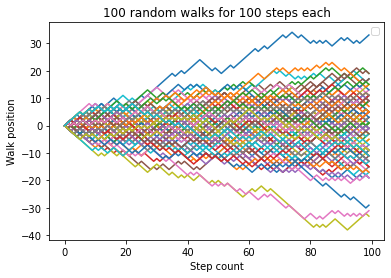

In [21]:
# plot a bunch of walks #
for i in range(100):
    plotWalk(walk(100))
setPlot("100 random walks for 100 steps each", "Step count", "Walk position")

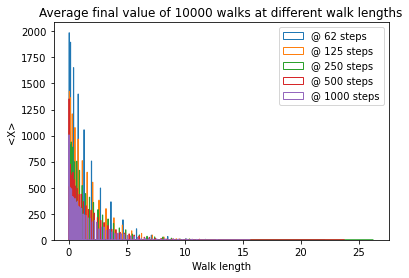

In [22]:
# plot final values #
hists(10000, "diff")
setPlot("Average final value of 10000 walks at different walk lengths", "Walk length", "<X>")

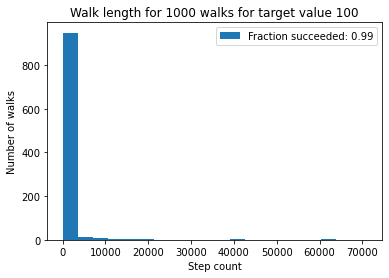

In [23]:
# plot average walk length #
averageUntils(5, 1000, 100000)
setPlot("Walk length for 1000 walks for target value 100", "Step count", "Number of walks")

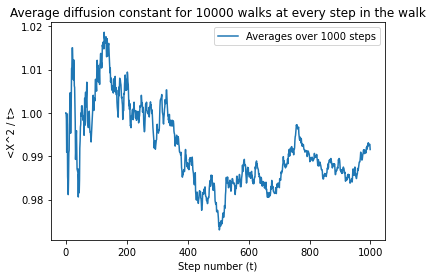

In [24]:
# average <x> #
getAverages(10000, 1000, "diff")
setPlot("Average diffusion constant for 10000 walks at every step in the walk", "Step number (t)", "<X^2 / t>")